In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from IPython.display import clear_output
import re
import time

In [5]:
df=pd.read_csv('C:/Users/lahar/Downloads/samsung_pricing_data.csv')

In [6]:
df

,Date,Model,Brand,Color,RAM,Storage,Price_Amazon,Price_Flipkart,Price_Reliance
0,26-08-2021,Samsung Galaxy Z Fold 3,Samsung,Black,16GB,1TB,56217.81,41959.31,49581.10
1,27-08-2021,Samsung Galaxy S21,Samsung,White,8GB,1TB,96550.00,66933.07,48535.49
2,27-08-2021,Samsung Galaxy A52,Samsung,Blue,32GB,512GB,81239.58,90106.21,95344.08
3,27-08-2021,Samsung Galaxy Z Fold 3,Samsung,Blue,4GB,1TB,71906.09,80255.74,48717.78
4,27-08-2021,Samsung Galaxy A52,Samsung,Blue,4GB,512GB,40921.30,85459.28,50308.43
...,...,...,...,...,...,...,...,...,...
995,21-08-2024,Samsung Galaxy Z Fold 3,Samsung,Black,8GB,512GB,36410.75,74986.86,92436.00
996,21-08-2024,Samsung Galaxy M32,Samsung,White,8GB,512GB,94211.95,95963.02,42166.40
997,21-08-2024,Samsung Galaxy Z Fold 3,Samsung,Green,8GB,1TB,39577.30,33827.06,52994.94
998,21-08-2024,Samsung Galaxy M32,Samsung,Blue,4GB,256GB,96516.61,32993.83,51593.23


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Model           1000 non-null   object 
 2   Brand           1000 non-null   object 
 3   Color           1000 non-null   object 
 4   RAM             1000 non-null   object 
 5   Storage         1000 non-null   object 
 6   Price_Amazon    1000 non-null   float64
 7   Price_Flipkart  1000 non-null   float64
 8   Price_Reliance  1000 non-null   float64
dtypes: float64(3), object(6)
memory usage: 70.4+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'].str.replace('/', '-'), dayfirst=True, errors='coerce')


In [9]:
df['Date']

0     2021-08-26
1     2021-08-27
2     2021-08-27
3     2021-08-27
4     2021-08-27
         ...    
995   2024-08-21
996   2024-08-21
997   2024-08-21
998   2024-08-21
999   2024-08-23
Name: Date, Length: 1000, dtype: datetime64[ns]

In [10]:
import sklearn
#to convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label

LabelEncoder()

In [11]:
df['Model']=label.fit_transform(df['Model'])
df['Model']
df['Brand']=label.fit_transform(df['Brand'])
df['Brand']
df['Color']=label.fit_transform(df['Color'])
df['Color']

0      0
1      4
2      1
3      1
4      1
      ..
995    0
996    4
997    2
998    1
999    4
Name: Color, Length: 1000, dtype: int32

In [12]:
df['RAM'] = df['RAM'].str.replace('GB', '', case=False)

# Convert the RAM column to integer type (optional)
df['RAM'] = df['RAM'].astype(int)


In [13]:
df['RAM']

0      16
1       8
2      32
3       4
4       4
       ..
995     8
996     8
997     8
998     4
999    32
Name: RAM, Length: 1000, dtype: int32

In [14]:
def convert_to_gb(value):
    if 'TB' in value:
        return int(value.replace('TB', '').strip()) * 1024  # Convert TB to GB
    elif 'GB' in value:
        return int(value.replace('GB', '').strip())  # Keep GB as is
    else:
        return None  # Handle unexpected cases



In [15]:
# Apply the conversion function to the Storage column
df['Storage'] = df['Storage'].apply(convert_to_gb)

# Display the updated DataFrame
print(df['Storage'])

0      1024
1      1024
2       512
3      1024
4       512
       ... 
995     512
996     512
997    1024
998     256
999     128
Name: Storage, Length: 1000, dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1000 non-null   datetime64[ns]
 1   Model           1000 non-null   int32         
 2   Brand           1000 non-null   int32         
 3   Color           1000 non-null   int32         
 4   RAM             1000 non-null   int32         
 5   Storage         1000 non-null   int64         
 6   Price_Amazon    1000 non-null   float64       
 7   Price_Flipkart  1000 non-null   float64       
 8   Price_Reliance  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(4), int64(1)
memory usage: 54.8 KB


In [17]:
df['Best_Price'] = df[['Price_Amazon', 'Price_Flipkart', 'Price_Reliance']].min(axis=1)

In [18]:
df['Best_Price'] 

0      41959.31
1      48535.49
2      81239.58
3      48717.78
4      40921.30
         ...   
995    36410.75
996    42166.40
997    33827.06
998    32993.83
999    48753.10
Name: Best_Price, Length: 1000, dtype: float64

In [19]:
df['Best_Price_Source'] = df[['Price_Amazon', 'Price_Flipkart', 'Price_Reliance']].idxmin(axis=1)

In [20]:
df['Best_Price_Source']

0      Price_Flipkart
1      Price_Reliance
2        Price_Amazon
3      Price_Reliance
4        Price_Amazon
            ...      
995      Price_Amazon
996    Price_Reliance
997    Price_Flipkart
998    Price_Flipkart
999    Price_Flipkart
Name: Best_Price_Source, Length: 1000, dtype: object

In [123]:
!pip install matplotlib



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ConversionError: Failed to convert value(s) to axis units: array(['Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Reliance', 'Price_Reliance', 'Price_Flipkart',
       'Price_Amazon', 'Price_Reliance', 'Price_Amazon', 'Price_Flipkart',
       'Price_Amazon', 'Price_Amazon', 'Price_Flipkart', 'Price_Amazon',
       'Price_Reliance', 'Price_Flipkart', 'Price_Amazon', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Reliance',
       'Price_Reliance', 'Price_Amazon', 'Price_Amazon', 'Price_Reliance',
       'Price_Amazon', 'Price_Flipkart', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Reliance',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart',
       'Price_Reliance', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart',
       'Price_Reliance', 'Price_Flipkart', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Reliance',
       'Price_Reliance', 'Price_Flipkart', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Amazon', 'Price_Flipkart',
       'Price_Amazon', 'Price_Reliance', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Flipkart',
       'Price_Amazon', 'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Reliance',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Flipkart', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Reliance', 'Price_Reliance', 'Price_Amazon',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Reliance',
       'Price_Amazon', 'Price_Reliance', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Amazon', 'Price_Reliance', 'Price_Flipkart', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Amazon', 'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Reliance',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Amazon', 'Price_Amazon', 'Price_Amazon', 'Price_Flipkart',
       'Price_Amazon', 'Price_Reliance', 'Price_Reliance', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Reliance', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Amazon', 'Price_Flipkart',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart', 'Price_Amazon',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Reliance',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Amazon', 'Price_Reliance', 'Price_Amazon', 'Price_Reliance',
       'Price_Amazon', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Amazon', 'Price_Reliance', 'Price_Amazon',
       'Price_Reliance', 'Price_Reliance', 'Price_Flipkart',
       'Price_Amazon', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Reliance',
       'Price_Flipkart', 'Price_Amazon', 'Price_Reliance',
       'Price_Reliance', 'Price_Reliance', 'Price_Flipkart',
       'Price_Amazon', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Flipkart', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Flipkart', 'Price_Reliance',
       'Price_Amazon', 'Price_Flipkart', 'Price_Amazon', 'Price_Reliance',
       'Price_Reliance', 'Price_Amazon', 'Price_Reliance',
       'Price_Flipkart', 'Price_Reliance', 'Price_Reliance',
       'Price_Reliance', 'Price_Reliance', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Reliance',
       'Price_Amazon', 'Price_Amazon', 'Price_Reliance', 'Price_Reliance',
       'Price_Flipkart', 'Price_Reliance', 'Price_Reliance',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Amazon', 'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Reliance',
       'Price_Flipkart', 'Price_Reliance', 'Price_Reliance',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Reliance',
       'Price_Flipkart', 'Price_Reliance', 'Price_Reliance',
       'Price_Amazon', 'Price_Amazon', 'Price_Flipkart', 'Price_Reliance',
       'Price_Amazon', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Reliance',
       'Price_Reliance', 'Price_Flipkart', 'Price_Reliance',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Amazon', 'Price_Reliance',
       'Price_Reliance', 'Price_Reliance', 'Price_Amazon', 'Price_Amazon',
       'Price_Amazon', 'Price_Amazon', 'Price_Flipkart', 'Price_Reliance',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Reliance',
       'Price_Amazon', 'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Reliance',
       'Price_Amazon', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Reliance',
       'Price_Reliance', 'Price_Reliance', 'Price_Reliance',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Amazon', 'Price_Reliance',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart', 'Price_Amazon',
       'Price_Amazon', 'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart',
       'Price_Reliance', 'Price_Flipkart', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Flipkart', 'Price_Reliance',
       'Price_Reliance', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Amazon', 'Price_Reliance',
       'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Reliance',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Reliance',
       'Price_Reliance', 'Price_Reliance', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Flipkart',
       'Price_Amazon', 'Price_Reliance', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Reliance',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Flipkart',
       'Price_Amazon', 'Price_Amazon', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Reliance',
       'Price_Amazon', 'Price_Reliance', 'Price_Amazon', 'Price_Amazon',
       'Price_Reliance', 'Price_Flipkart', 'Price_Reliance',
       'Price_Amazon', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Amazon', 'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon',
       'Price_Reliance', 'Price_Flipkart', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon', 'Price_Amazon',
       'Price_Reliance', 'Price_Flipkart', 'Price_Reliance',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Amazon', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Flipkart', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Reliance',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Flipkart',
       'Price_Amazon', 'Price_Flipkart', 'Price_Reliance',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Reliance',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Flipkart', 'Price_Amazon',
       'Price_Reliance', 'Price_Flipkart', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Reliance', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Reliance',
       'Price_Amazon', 'Price_Amazon', 'Price_Reliance', 'Price_Flipkart',
       'Price_Amazon', 'Price_Amazon', 'Price_Reliance', 'Price_Reliance',
       'Price_Flipkart', 'Price_Amazon', 'Price_Reliance', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Reliance',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon',
       'Price_Reliance', 'Price_Flipkart', 'Price_Reliance',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Reliance',
       'Price_Amazon', 'Price_Reliance', 'Price_Flipkart', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Flipkart', 'Price_Amazon',
       'Price_Amazon', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Amazon', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Amazon', 'Price_Reliance',
       'Price_Amazon', 'Price_Flipkart', 'Price_Reliance',
       'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Reliance', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Flipkart',
       'Price_Amazon', 'Price_Reliance', 'Price_Flipkart', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Amazon', 'Price_Amazon', 'Price_Amazon', 'Price_Reliance',
       'Price_Amazon', 'Price_Amazon', 'Price_Reliance', 'Price_Reliance',
       'Price_Flipkart', 'Price_Reliance', 'Price_Reliance',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Amazon', 'Price_Amazon', 'Price_Flipkart', 'Price_Reliance',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart',
       'Price_Reliance', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Amazon', 'Price_Reliance',
       'Price_Amazon', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Reliance',
       'Price_Reliance', 'Price_Amazon', 'Price_Reliance',
       'Price_Reliance', 'Price_Flipkart', 'Price_Reliance',
       'Price_Reliance', 'Price_Amazon', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Reliance',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon', 'Price_Amazon',
       'Price_Amazon', 'Price_Amazon', 'Price_Reliance', 'Price_Reliance',
       'Price_Amazon', 'Price_Flipkart', 'Price_Reliance',
       'Price_Flipkart', 'Price_Reliance', 'Price_Reliance',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Reliance',
       'Price_Reliance', 'Price_Reliance', 'Price_Reliance',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Amazon', 'Price_Flipkart', 'Price_Reliance',
       'Price_Flipkart', 'Price_Reliance', 'Price_Reliance',
       'Price_Amazon', 'Price_Amazon', 'Price_Amazon', 'Price_Reliance',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Reliance',
       'Price_Reliance', 'Price_Reliance', 'Price_Flipkart',
       'Price_Amazon', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Amazon', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Amazon', 'Price_Reliance',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Amazon', 'Price_Reliance',
       'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Reliance',
       'Price_Amazon', 'Price_Flipkart', 'Price_Reliance',
       'Price_Reliance', 'Price_Amazon', 'Price_Amazon', 'Price_Reliance',
       'Price_Amazon', 'Price_Reliance', 'Price_Reliance',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Amazon', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Reliance',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Amazon', 'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Amazon', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Reliance',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Reliance',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Reliance',
       'Price_Amazon', 'Price_Amazon', 'Price_Reliance', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Flipkart', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Reliance',
       'Price_Reliance', 'Price_Flipkart', 'Price_Reliance',
       'Price_Amazon', 'Price_Amazon', 'Price_Reliance', 'Price_Reliance',
       'Price_Amazon', 'Price_Flipkart', 'Price_Reliance',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Reliance', 'Price_Reliance', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Reliance', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Reliance',
       'Price_Reliance', 'Price_Flipkart', 'Price_Reliance',
       'Price_Flipkart', 'Price_Amazon', 'Price_Reliance', 'Price_Amazon',
       'Price_Reliance', 'Price_Amazon', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Amazon',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Reliance', 'Price_Reliance', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Amazon', 'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Amazon', 'Price_Reliance', 'Price_Amazon', 'Price_Reliance',
       'Price_Amazon', 'Price_Reliance', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Amazon', 'Price_Amazon', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Amazon', 'Price_Reliance', 'Price_Amazon',
       'Price_Amazon', 'Price_Amazon', 'Price_Amazon', 'Price_Amazon',
       'Price_Amazon', 'Price_Amazon', 'Price_Reliance', 'Price_Amazon',
       'Price_Flipkart', 'Price_Amazon', 'Price_Amazon', 'Price_Flipkart',
       'Price_Amazon', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Amazon', 'Price_Amazon', 'Price_Reliance', 'Price_Flipkart',
       'Price_Reliance', 'Price_Amazon', 'Price_Amazon', 'Price_Flipkart',
       'Price_Reliance', 'Price_Amazon', 'Price_Amazon', 'Price_Flipkart',
       'Price_Flipkart', 'Price_Reliance', 'Price_Amazon', 'Price_Amazon',
       'Price_Flipkart', 'Price_Reliance', 'Price_Flipkart',
       'Price_Amazon', 'Price_Flipkart', 'Price_Reliance', 'Price_Amazon',
       'Price_Reliance', 'Price_Flipkart', 'Price_Flipkart',
       'Price_Flipkart'], dtype=object)

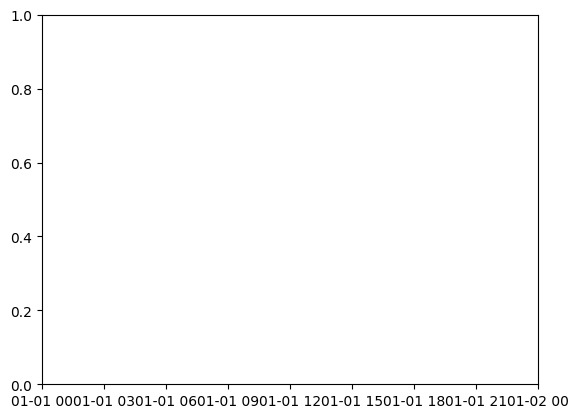

In [48]:
import matplotlib.pyplot as plt

# Plot the historical price
plt.plot(df)
plt.title('Historical Prices')
plt.show()

In [ ]:
!pip install statsmodels

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Example DataFrame (assuming you have your dataset in df)
# df = pd.read_csv('your_dataset.csv')

# Convert 'Date' to a numerical value (ordinal)
df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Encode categorical variables using Label Encoding (if you don't want to use one-hot encoding)
label_encoders = {}
for col in ['Brand', 'RAM', 'Storage', 'Color']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define the target variable 'y'
y = df['Best_Price']

# Define the feature variables 'X' by selecting specific columns
X = df[['Date_ordinal', 'Brand', 'RAM', 'Storage', 'Color']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=39)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 212426126.08704692
Mean Absolute Error (MAE): 12085.093920405494
R² Score: -0.003908221161314174


In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df['Best_Price'], order=(5, 1, 0))  # Example order, should be tuned
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             Best_Price   No. Observations:                 1000
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11038.941
Date:                Sat, 24 Aug 2024   AIC                          22089.882
Time:                        17:31:21   BIC                          22119.323
Sample:                             0   HQIC                         22101.072
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8540      0.034    -25.295      0.000      -0.920      -0.788
ar.L2         -0.6967      0.041    -17.137      0.000      -0.776      -0.617
ar.L3         -0.5212      0.042    -12.396      0.0

In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [55]:
# Predict the next 12 months (1 year)
forecast = model_fit.forecast(steps=12)
price_series=df['Best_Price']
# Create a date range for the forecast period
forecast_dates = pd.date_range(start=price_series.index[-1], periods=13, freq='M')[1:]

# Create a DataFrame to store the forecasted prices
forecast_df = pd.DataFrame({'Date': forecast_dates, 'PredictedPrice': forecast})
forecast_df.set_index('Date', inplace=True)

# Print the forecasted prices
print(forecast_df)

            PredictedPrice
Date                      
2024-09-30    38667.586551
2024-10-31    38979.483856
2024-11-30    39161.225558
2024-12-31    38214.025823
2025-01-31    40055.951632
2025-02-28    40526.334797
2025-03-31    39216.843593
2025-04-30    39377.029000
2025-05-31    39360.359684
2025-06-30    39476.011972
2025-07-31    39726.433048
2025-08-31    39587.314392


C:\Users\lahar\OneDrive\augustworkshop\lahari\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lahar\AppData\Local\Temp\ipykernel_19792\3770854386.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=price_series.index[-1], periods=13, freq='M')[1:]


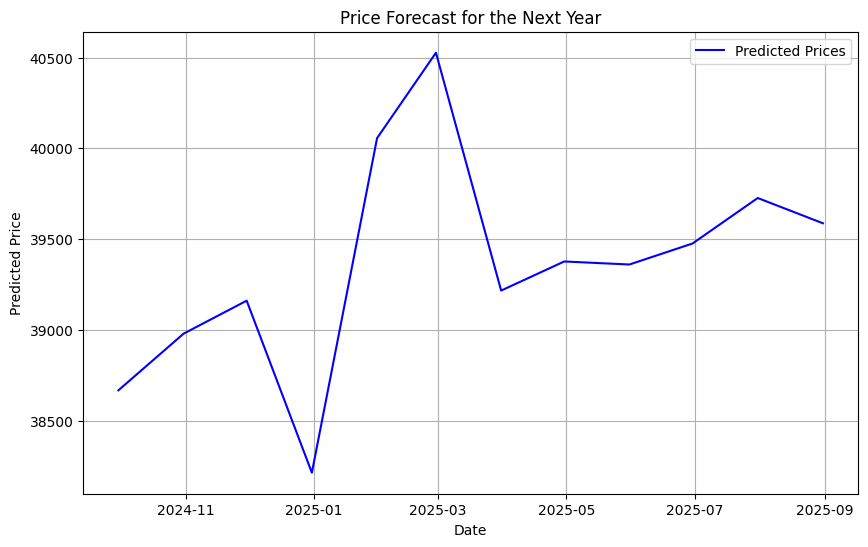

In [57]:
# Plot the predicted prices for the next 12 months
plt.figure(figsize=(10, 6))
plt.plot(forecast_df, label='Predicted Prices', color='blue')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.title('Price Forecast for the Next Year')
plt.legend()
plt.grid(True)
plt.show()

In [144]:
import pickle

In [147]:
with open('Mobile.pkl','wb') as f:
    pickle.dump(model_fit,f)